In [1]:
%matplotlib inline

import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Data Source : https://grouplens.org/datasets/movielens

rating_file_path = "../data/ml-1m/ratings.dat"
movie_file_path = "../data/ml-1m/movies.dat"
user_file_path = "../data/ml-1m/users.dat"

rating_data = pd.io.parsers.read_csv(rating_file_path, 
                                     names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::',  encoding = 'ISO-8859-1')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::', encoding = 'ISO-8859-1')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding = 'ISO-8859-1')

/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_12535/3864209630.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.io.parsers.read_csv(rating_file_path,
/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_12535/3864209630.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_data = pd.io.parsers.read_csv(movie_file_path,
/var/folders/y6/p039ghpx4kl3tg5t_shd2dzm0000gn/T/ipykernel_12535/3864209630.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are inter

In [3]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
#영화 갯수 구하기
len(movie_data['movie_id'].unique())

3883

In [6]:
#연도별 영화 개수 top10 출력

movie_data['year'] = movie_data['title'].apply(lambda x: x[-5:-1])
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

10년주기로 영화 개수 세기

In [7]:
year = movie_data['year'].apply(lambda x: x[0:3] + '0')
year.value_counts().sort_index()

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: year, dtype: int64

In [8]:
movie_data

,movie_id,title,genre,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


/Users/hanjihun/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


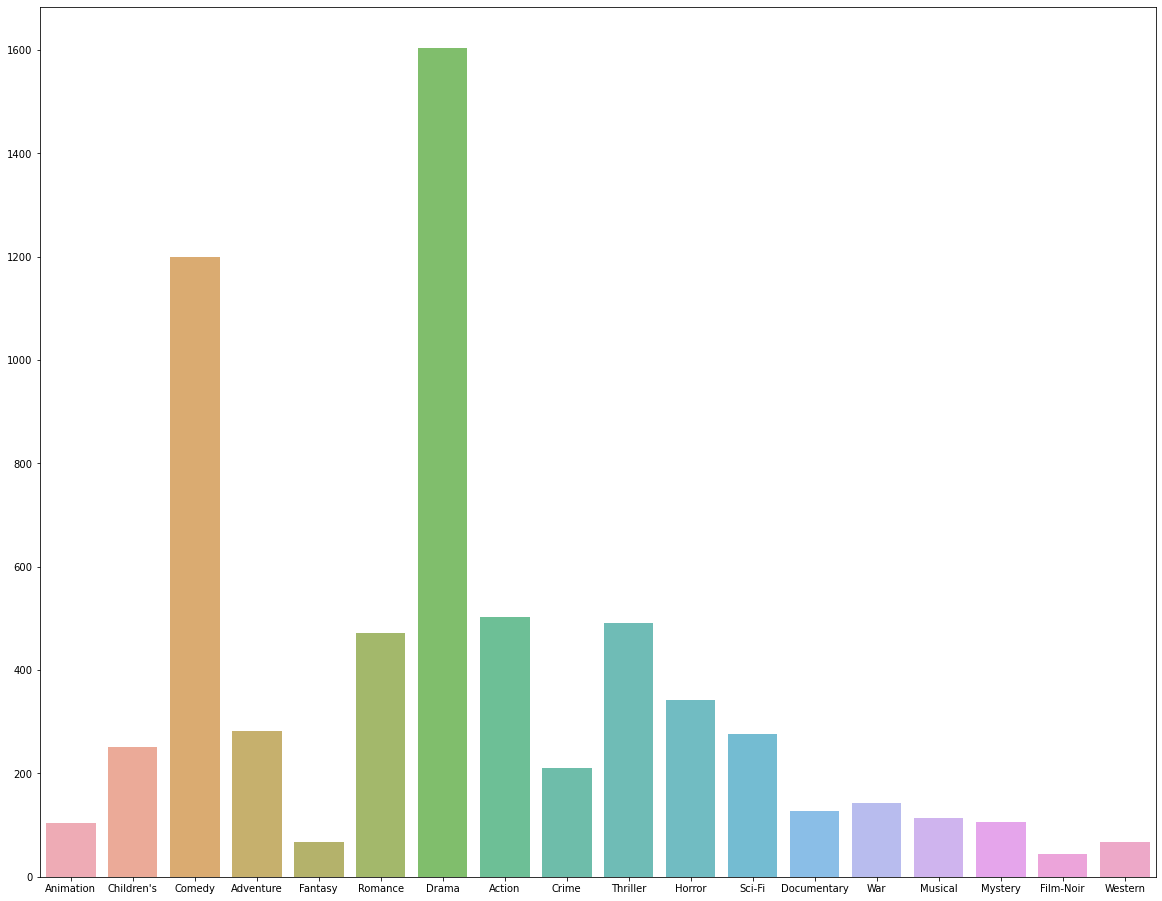

In [9]:
unique_genre = {}
for index, row in movie_data.iterrows():
    genre_combination = row['genre']
    paresd_genre = genre_combination.split('|')
    for genre in paresd_genre:
        if genre in unique_genre:
            unique_genre[genre] += 1
        else:
            unique_genre[genre] = 1

plt.rcParams['figure.figsize'] = [20,16]
sns.barplot(list(unique_genre.keys()), list(unique_genre.values()), alpha=0.8)
plt.show()

In [10]:
len(user_data['user_id'].unique())

6040

In [11]:
user_data

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


유저의 성별 탐색

In [12]:
user_data['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

In [13]:
user_data['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [14]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [15]:
movie_count = rating_data.groupby('movie_id')['rating'].count().values
movie_count

array([2077,  701,  478, ...,   54,   40,  388])

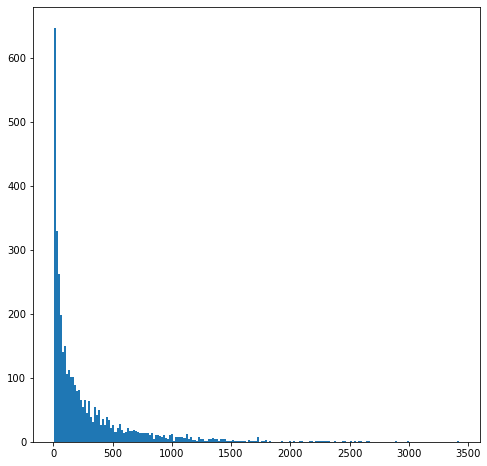

In [16]:
plt.rcParams['figure.figsize'] = [8,8]
fig = plt.hist(movie_count, bins=200)
plt.show()

In [17]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<AxesSubplot:>

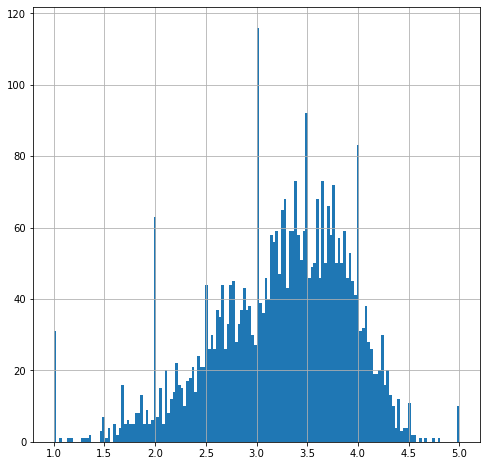

In [18]:
movie_rating = rating_data.groupby('movie_id')['rating'].mean()
movie_rating.hist(bins=150)

In [19]:
rating_data

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


미니퀴즈 3-5 1번 : 유저별로 평가한 영화 갯수

<AxesSubplot:xlabel='user_id'>

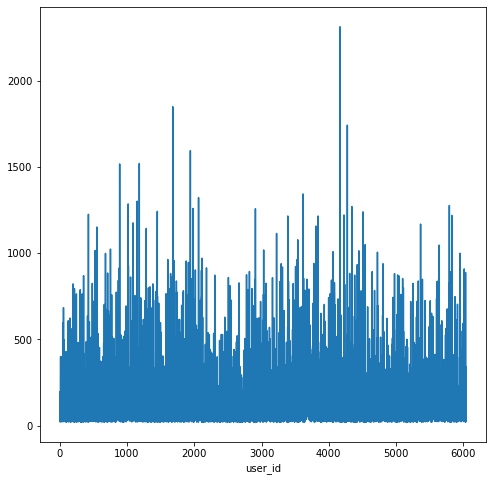

In [20]:
user_rating_count = rating_data.groupby('user_id')['rating'].count()
user_rating_count.plot()

2. 유저별로 평가한 평균 영화 점수

<AxesSubplot:>

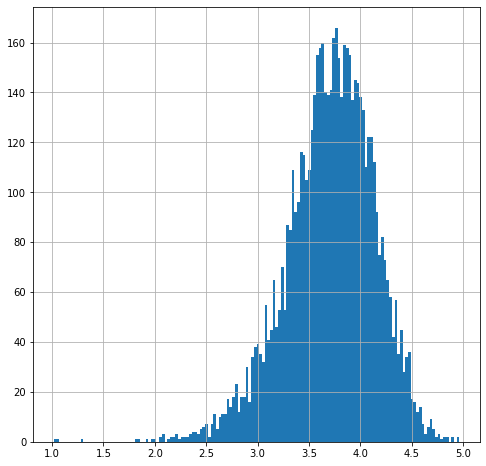

In [21]:
user_rating_mean = rating_data.groupby('user_id')['rating'].mean()
user_rating_mean.hist(bins=150)

In [22]:
rating_table = rating_data[['user_id', 'movie_id', 'rating']].set_index(['user_id','movie_id']).unstack()
rating_table

#unstack은 DataFrame의 재구조화

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036        NaN  NaN  NaN  2.0  NaN  3.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6037        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6038        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6039        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
6040        3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6037      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6038      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6039      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
6040      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[6040 rows x 3706 columns]

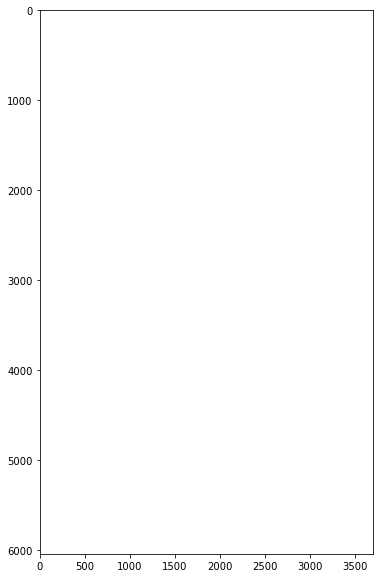

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(rating_table)
plt.grid(False)
plt.show()

#imshow는 행렬의 값을 그래프로 표현
#grid는 격자 on, off

위의 그래프는 색이 없는 행렬인 희소 행렬이다. 대부분의 Rating점수가 채워지지 않았으므로 비어있는 Rating을 채워넣는 방법인 **행렬 완성**을 통해 채워넣자.

**행렬 완성**은 **행렬 분해** 방법을 이용한다. 하나의 행렬을 여러 개의 행렬 곱으로 나타내는 방법으로, 이 예제는 행렬 분해중에서도 가장 활용도가 높은 **특이값 분해** (SVD) 방법을 활용한다.

> conda install -c conda-forge scikit-surprise

> pip install scikit-surprise

> pip install surprise

In [27]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [30]:
#Reader객체는 평점의 범위가 1~5점
reader = Reader(rating_scale=(1,5))
#surprise의 Dataset 설정
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)
#학습 데이터 설정
train_data = data.build_full_trainset()

train_start =  time.time()
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)

#n_factor = 요인의 수 default=100
#lr_all = 모든 매개변수의 학습률 defalut=0.005
#reg_all = 모든 매개변수에 대한 정규화 용어 default=0.02
#n_epochs = SGD(경사하강 학습법) 반복 개수 default = 20

model.fit(train_data)
train_end = time.time()
print('training time is %.2f seconds' %(train_end - train_start))

#1. 학습데이터를 Reader객체를 통하여 구현
#2. 모델을 정한 후 학습데이터를 학습
#3. 학습시간 추출


training time is 55.04 seconds


In [31]:
#학습한 모델의 평점 예측 결과를 확인하기 위해 한명의 유저 선정
target_user_id = 4
target_user_data = rating_data[rating_data['user_id'] == target_user_id]
target_user_data

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282
238,4,260,5,978294199
239,4,2028,5,978294230
240,4,480,4,978294008
241,4,1196,2,978294199
242,4,1198,5,978294199


In [33]:
#타켓 유저의 movie_id와 rating을 딕셔너리형으로 저장
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():
    target_user_movie_rating_dict[row['movie_id']] = row['rating']

target_user_movie_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [47]:
test_data = []
test_rating = 0

for index, row in movie_data.iterrows():
    if row['movie_id'] in target_user_movie_rating_dict:
        continue
    test_data.append([target_user_id, row['movie_id'], test_rating])

test_data


[[4, 1, 0],
 [4, 2, 0],
 [4, 3, 0],
 [4, 4, 0],
 [4, 5, 0],
 [4, 6, 0],
 [4, 7, 0],
 [4, 8, 0],
 [4, 9, 0],
 [4, 10, 0],
 [4, 11, 0],
 [4, 12, 0],
 [4, 13, 0],
 [4, 14, 0],
 [4, 15, 0],
 [4, 16, 0],
 [4, 17, 0],
 [4, 18, 0],
 [4, 19, 0],
 [4, 20, 0],
 [4, 21, 0],
 [4, 22, 0],
 [4, 23, 0],
 [4, 24, 0],
 [4, 25, 0],
 [4, 26, 0],
 [4, 27, 0],
 [4, 28, 0],
 [4, 29, 0],
 [4, 30, 0],
 [4, 31, 0],
 [4, 32, 0],
 [4, 33, 0],
 [4, 34, 0],
 [4, 35, 0],
 [4, 36, 0],
 [4, 37, 0],
 [4, 38, 0],
 [4, 39, 0],
 [4, 40, 0],
 [4, 41, 0],
 [4, 42, 0],
 [4, 43, 0],
 [4, 44, 0],
 [4, 45, 0],
 [4, 46, 0],
 [4, 47, 0],
 [4, 48, 0],
 [4, 49, 0],
 [4, 50, 0],
 [4, 51, 0],
 [4, 52, 0],
 [4, 53, 0],
 [4, 54, 0],
 [4, 55, 0],
 [4, 56, 0],
 [4, 57, 0],
 [4, 58, 0],
 [4, 59, 0],
 [4, 60, 0],
 [4, 61, 0],
 [4, 62, 0],
 [4, 63, 0],
 [4, 64, 0],
 [4, 65, 0],
 [4, 66, 0],
 [4, 67, 0],
 [4, 68, 0],
 [4, 69, 0],
 [4, 70, 0],
 [4, 71, 0],
 [4, 72, 0],
 [4, 73, 0],
 [4, 74, 0],
 [4, 75, 0],
 [4, 76, 0],
 [4, 77, 0],
 [4, 78,

In [48]:
target_user_predict = model.test(test_data)

target_user_predict

[Prediction(uid=4, iid=1, r_ui=0, est=4.384512921589561, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.1427487679640955, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.830873080431971, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.227900969103246, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=2.8512248743513937, details={'was_impossible': False}),
 Prediction(uid=4, iid=6, r_ui=0, est=4.112498992137746, details={'was_impossible': False}),
 Prediction(uid=4, iid=7, r_ui=0, est=3.533071168581544, details={'was_impossible': False}),
 Prediction(uid=4, iid=8, r_ui=0, est=3.311298362751652, details={'was_impossible': False}),
 Prediction(uid=4, iid=9, r_ui=0, est=2.4426407686868274, details={'was_impossible': False}),
 Prediction(uid=4, iid=10, r_ui=0, est=3.207992468461805, details={'was_impossible': False}),
 Prediction(uid=4, iid=11, r_ui=0, est=3.80520574076207, details={

In [54]:
#타켓 유저가 평가하지 않은 영화의 예측 Rating을 반환하는 함수
def get_user_predicted_ratings(predict, user_id, user_history):
    target_user_movie_predict_dict = {}
    for u_id, m_id, _, predict_rating, _ in predict:
        if u_id == user_id:
            if m_id not in user_history:
                target_user_movie_predict_dict[m_id] = predict_rating
    return target_user_movie_predict_dict
    

In [71]:
#타켓유저의 예측한 점수 top10 추출
target_user_predict_ratings = get_user_predicted_ratings(target_user_predict, target_user_id, target_user_movie_rating_dict)
target_user_predict_top10 = sorted(target_user_predict_ratings.items(), key=operator.itemgetter(1), reverse=True)[:10]
target_user_predict_top10

[(213, 5),
 (309, 5),
 (326, 5),
 (527, 5),
 (602, 5),
 (615, 5),
 (858, 5),
 (898, 5),
 (904, 5),
 (905, 5)]

In [83]:
#top10의 movie_id가 아닌 title로 짝지어 추출

#movie_dict는 movie_id : title인 딕셔너리
movie_dict = {}

for index, row in movie_data.iterrows():
    movie_dict[row['movie_id']] = row['title']

for row in target_user_predict_top10:
    print(movie_dict[row[0]], ':', row[1])

Burnt By the Sun (Utomlyonnye solntsem) (1994) : 5
Red Firecracker, Green Firecracker (1994) : 5
To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Great Day in Harlem, A (1994) : 5
Bread and Chocolate (Pane e cioccolata) (1973) : 5
Godfather, The (1972) : 5
Philadelphia Story, The (1940) : 5
Rear Window (1954) : 5
It Happened One Night (1934) : 5


우리가 구한 예측값이 얼마나 정확한 예측인지 확인하기 위해 RMSE(Root Mean Square Deviation; 평균 제곱근 편차) 방법을 이용하여 예측 모델이 얼마나 정확하게 행렬을 완성했는지 평가한다.

In [84]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id', 'movie_id', 'rating']], reader)

from surprise.model_selection import train_test_split

#학습데이터와 테스트데이터 8:2비율
train_data, test_data = train_test_split(data, test_size=0.2)

train_start = time.time()
model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)
#모델을 학습데이터에 학습
model.fit(train_data)

train_end = time.time()
print('학습 소요시간은 %.2f초입니다' %(train_end-train_start))
#모델을 테스트데이터에 test
predictions = model.test(test_data)

accuracy.rmse(predictions)

학습 소요시간은 53.14초입니다
RMSE: 0.8575


0.8574802058010559

실제 평점과의 비교 시각화(타켓 유저가 실제로 평가한 데이터를 테스트데이터로)

In [122]:
target_user_predictions[:2]

[Prediction(uid=4, iid=3468, r_ui=5, est=4.7664898390697585, details={'was_impossible': False}),
 Prediction(uid=4, iid=1210, r_ui=3, est=3.1904285546520796, details={'was_impossible': False})]

In [163]:
#타겟 유저가 실제로 평가한 데이터를 test_data로

test_data = []
target_user_id = 4
for target_movie_id, target_ratings in target_user_movie_rating_dict.items():
    test_data.append((target_user_id, target_movie_id, target_ratings))

#테스트데이터 생성
target_user_predictions = model.test(test_data)

#target_user_predict_movie_ratings = movie_id : predict_ratings 형태의 딕셔너리
target_user_predict_movie_ratings = {}

#예측 데이터 target_user_predictions에서 movie_id, predict_ratings 추출하기
for u_id, m_id, _, predicted_ratings, _ in target_user_predictions:
    if u_id == target_user_id:
        if m_id in target_user_movie_rating_dict:
            target_user_predict_movie_ratings[m_id] = predicted_ratings

target_user_predict_movie_ratings

{3468: 4.7664898390697585,
 1210: 3.1904285546520796,
 2951: 4.404847565436989,
 1214: 4.275413311356886,
 1036: 4.031710049663934,
 260: 4.0182514611167575,
 2028: 4.423119548867859,
 480: 3.444208165905728,
 1196: 3.6912886036161905,
 1198: 4.476985078543741,
 1954: 4.353263697698556,
 1097: 4.362665731174741,
 3418: 4.332446404120691,
 3702: 3.802349822097871,
 2366: 4.3007333315361915,
 1387: 4.518795542075765,
 3527: 3.298624959649649,
 1201: 4.482026357126673,
 2692: 3.8824449613724896,
 2947: 4.289446100295416,
 1240: 4.165617760433923}

title - ratings - predict_ratings 형식으로 출력

In [168]:
target_movie_title = []
target_movie_origin_ratings = []
target_movie_predcit_ratings = []

for movie_id, predict_ratings in target_user_predict_movie_ratings.items():
    target_movie_title.append(movie_data.loc[movie_id-1].title)
    target_movie_origin_ratings.append(rating_data.loc[movie_id-1].rating)
    target_movie_predcit_ratings.append(predict_ratings)

for i in range(len(target_movie_origin_ratings)):
    print('movie', i+1, ':', target_movie_title[i], '-', target_movie_origin_ratings[i], '/', target_movie_predcit_ratings[i])

movie 1 : Keeping the Faith (2000) - 4 / 4.7664898390697585
movie 2 : Once Upon a Time in America (1984) - 2 / 3.1904285546520796
movie 3 : Drugstore Cowboy (1989) - 5 / 4.404847565436989
movie 4 : Stalker (1979) - 4 / 4.275413311356886
movie 5 : Ghost and the Darkness, The (1996) - 4 / 4.031710049663934
movie 6 : Little Princess, A (1995) - 5 / 4.0182514611167575
movie 7 : Sleeping Beauty (1959) - 3 / 4.423119548867859
movie 8 : King of the Hill (1993) - 4 / 3.444208165905728
movie 9 : GoodFellas (1990) - 3 / 3.6912886036161905
movie 10 : Army of Darkness (1993) - 4 / 4.476985078543741
movie 11 : Last Temptation of Christ, The (1988) - 5 / 4.353263697698556
movie 12 : Palookaville (1996) - 3 / 4.362665731174741
movie 13 : Devil Girl From Mars (1954) - 4 / 4.332446404120691
movie 14 : Dreamscape (1984) - 4 / 3.802349822097871
movie 15 : Down in the Delta (1998) - 5 / 4.3007333315361915
movie 16 : Michael (1996) - 4 / 4.518795542075765
movie 17 : Held Up (2000) - 3 / 3.298624959649649
m

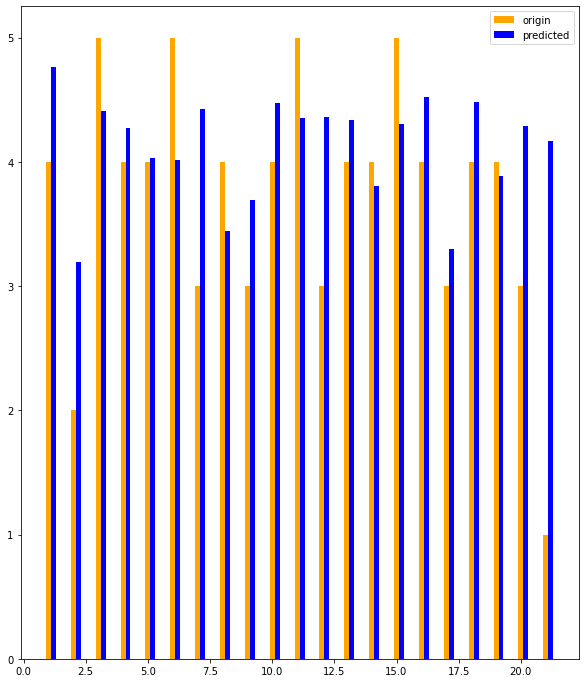

In [176]:
#origin과 predict 시각화
index = np.arange(1, len(target_movie_origin_ratings)+1)
width = 0.2
plt.rcParams['figure.figsize']= [10,12]
fig1 = plt.bar(index, target_movie_origin_ratings, width, color='orange', label='origin')
fig2 = plt.bar(index+width, target_movie_predcit_ratings, width, color='blue', label='predicted')
plt.legend()

plt.show()